**Review 1: Attempt 2.1**

In [1]:
!pip install yabox

In [2]:
%matplotlib inline

# Load local version of yabox
import sys
sys.path.insert(0, '../')

from yabox import DE, PDE
import numpy as np

# Imports required for 3d animations
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rcParams
from IPython.display import HTML

In [3]:
# There is a bug in matplotlib that prevents the use of ffmpeg and avconv!
# https://github.com/matplotlib/matplotlib/pull/8743

avail_writers = matplotlib.animation.writers.list()
    
# Functions to generate 3d animations

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_html5_video())


def generate_video(problem, algorithm, figsize=(12, 8), frames=100, interval=100):
    # Try to use tqdm to show progress
    use_tqdm = True
    try:
        from tqdm.auto import tqdm
    except:
        use_tqdm = False
    
    figure = plt.figure(figsize=figsize)
    ax = Axes3D(figure)
    problem.plot3d(ax3d=ax)
    minz = min(ax.get_zlim())
    it = algorithm.geniterator()
    if use_tqdm:
        it = iter(tqdm(it, total=frames))

    def animate(i):
        ax.clear()
        ax.autoscale(enable=False)
        problem.plot3d(ax3d=ax)
        status = next(it)
        population = status.population
        P = algorithm.denormalize(population)
        fitness = status.fitness
        idx = status.best_idx
        PT = P.T
        # Individuals
        ax.scatter(PT[0], PT[1], fitness, s=30, c='#930039', marker='o', depthshade=False, zorder=999)
        # Shadow projections
        ax.scatter(PT[0], PT[1], np.full_like(PT[0], minz), alpha=0.5, s=50, c='black', marker='o', 
                   edgecolors='none', depthshade=False, zorder=999)
        
    anim = animation.FuncAnimation(figure, animate, frames=frames, interval=interval, blit=False)
    return anim

In [4]:
from yabox.problems import Ackley, Levy
problem = Ackley()

In [5]:
algorithm = DE(problem, problem.bounds)
anim = generate_video(problem, algorithm, figsize=(12, 8), frames=10, interval=100)
display_animation(anim)

  0%|          | 0/10 [00:00<?, ?it/s]

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [6]:
algorithm

**Attempt 2.2**

In [7]:
def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

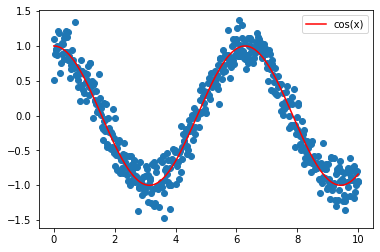

In [9]:
x = np.linspace(0, 10, 500)
y = np.cos(x) + np.random.normal(0, 0.2, 500)
plt.scatter(x, y)
plt.plot(x, np.cos(x), label='cos(x)',c = 'r')
plt.legend()
plt.show()

In [10]:
def fmodel(x, w):
    return w[0] + w[1]*x + w[2] * x**2 + w[3] * x**3 + w[4] * x**4 + w[5] * x**5

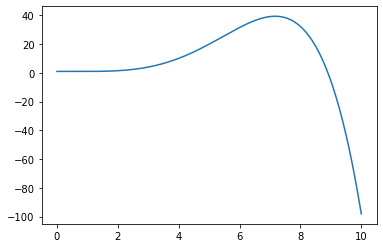

In [11]:
plt.plot(x, fmodel(x, [1.0, -0.01, 0.01, -0.1, 0.1, -0.01]))

In [12]:
def rmse(w):
    y_pred = fmodel(x, w)
    return np.sqrt(sum((y - y_pred)**2) / len(y))

In [13]:
result = list(de(rmse, [(-5, 5)] * 6, its=2000))

In [14]:
result

[(array([-1.12258681, -2.20421124, -3.04382206,  1.86773992,  2.85774771,
         -0.49096878]),
  4920.471071069792),
 (array([-1.12258681, -2.20421124, -3.04382206,  1.86773992,  2.85774771,
         -0.49096878]),
  4920.471071069792),
 (array([ 4.29694312,  2.91828755, -0.99416918,  4.33272362, -5.        ,
          0.47787728]),
  1444.0554835686003),
 (array([ 4.29694312,  2.91828755, -0.99416918,  4.33272362, -5.        ,
          0.47787728]),
  1444.0554835686003),
 (array([ 2.93377465,  2.5850489 , -5.        ,  1.10579731, -0.86968993,
          0.05801762]),
  961.1555690009577),
 (array([ 2.93377465,  2.5850489 , -5.        ,  1.10579731, -0.86968993,
          0.05801762]),
  961.1555690009577),
 (array([ 3.52966239,  1.06803912, -5.        , -5.        ,  1.04970938,
         -0.05216301]),
  208.62276954014652),
 (array([ 3.52966239,  1.06803912, -5.        , -5.        ,  1.04970938,
         -0.05216301]),
  208.62276954014652),
 (array([ 3.52966239,  1.06803912, -

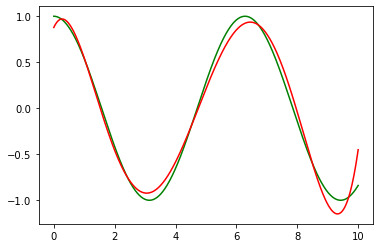

In [15]:
#plt.scatter(x, y)
plt.plot(x, np.cos(x), label='cos(x)', c = 'g')
plt.plot(x, fmodel(x,result[-1][0]), label='cos(x)', c = 'r')

In [16]:
result[-1][0]

array([ 0.87786462,  0.71427014, -1.519563  ,  0.53906165, -0.06806499,
        0.00285073])

In [17]:
def de2(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield min_b + pop * diff, fitness, best_idx

In [18]:
import matplotlib.animation as animation
from IPython.display import HTML

result = list(de2(rmse, [(-5, 5)] * 6, its=2000))

RuntimeError: Requested MovieWriter (ffmpeg) not available

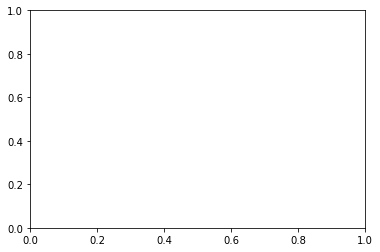

In [19]:
fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.set_ylim([-2, 2])
    ax.scatter(x, y)
    pop, fit, idx = result[i]
    for ind in pop:
        data = fmodel(x, ind)
        ax.plot(x, data, alpha=0.3)

anim = animation.FuncAnimation(fig, animate, frames=2000, interval=20)
HTML(anim.to_html5_video())

**Final Work for this attempt**

In [20]:
import numpy as np

def de3(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000, flag="new"):
    dimensions = len(bounds)
    pop=[]
    if(flag=="new"):
      pop = np.random.rand(popsize, dimensions)
      #print(pop)
    else:
      pop=flag
      #print(pop)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx], pop

In [21]:
first=list(de3(lambda x:sum(x),[(-6,6)]*5,its=100,flag="new"))
pop=first[-1][-1]
print("First 100 its list:",first[-1][0])

second=list(de3(lambda x:sum(x),[(-5,5)]*5,its=100,flag=pop))
pop=second[-1][-1]
print("Second 100 its list:",second[-1][0])

First 100 its list: [-6. -6. -6. -6. -6.]
Second 100 its list: [-5. -5. -5. -5. -5.]


<ipython-input-20-00698cd2a71b>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(flag=="new"):
